In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sb
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Prepare a prediction model for profit of 50_startups data. Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.

# Dataset Description
- R&D Spend -- Research and devolop spend in the past few years
- Administration -- spend on administration in the past few years
- Marketing Spend -- spend on Marketing in the past few years
- State -- states from which data is collected
- Profit  -- profit of each state in the past few years

## Independent Variables : R&D Spend,Administration,Marketing Spend,State
## Dependent Variable : Profit

In [2]:
startup_data=pd.read_csv('50_Startups.csv')

In [3]:
startup_data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
startup_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
startup_data['State']=startup_data['State'].astype('category')

In [6]:
startup_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   R&D Spend        50 non-null     float64 
 1   Administration   50 non-null     float64 
 2   Marketing Spend  50 non-null     float64 
 3   State            50 non-null     category
 4   Profit           50 non-null     float64 
dtypes: category(1), float64(4)
memory usage: 1.9 KB


In [7]:
startup_data1= startup_data.rename({'R&D Spend':'RD','Marketing Spend':'MS','Administration':'Ad','Profit':'Profit'},axis=1)

In [8]:
startup_data1

,RD,Ad,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [9]:
# Check for duplicates
startup_data1[startup_data1.duplicated()] # No Duplicates present

,RD,Ad,MS,State,Profit


In [10]:
# Dataset Description
startup_data1.describe()

,RD,Ad,MS,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


## Step 1 : Is there a connection between dependent and independent varaibles?

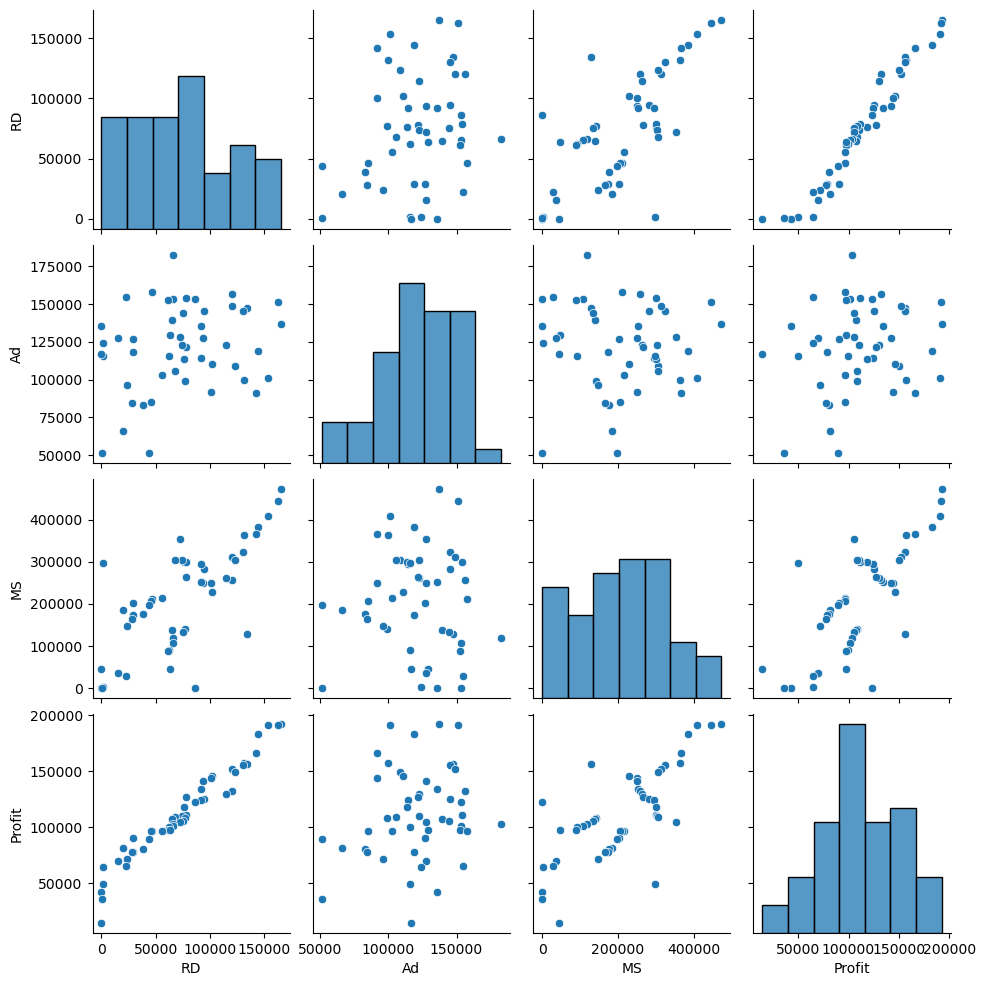

In [11]:
sb.pairplot(startup_data1)
plt.show()

## Step 2 : is the relationship linear?

In [12]:
startup_data1.corr()

,RD,Ad,MS,Profit
RD,1.000000,0.241955,0.724248,0.972900
Ad,0.241955,1.000000,-0.032154,0.200717
MS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


## From Above correlation coefficients and pair plot we observe that there is strong linear relation between profit and RD_Spend , Market_Spend and but weak linear relation with Administration

## Step 3 : Train the model

In [13]:
startup_model=ols('Profit~RD+Ad+MS',data=startup_data1).fit()

In [14]:
startup_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Thu, 27 Apr 2023   Prob (F-statistic):           4.53e-30
Time:                        14:05:35   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD             0.8057      0.045     17.846      0.000       0.715       0.897
Ad            -0.0268      0.051     -0.526      0.602      -0.130       0.076
MS             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
# Model parameters
startup_model.params

Intercept    50122.192990
RD               0.805715
Ad              -0.026816
MS               0.027228
dtype: float64

In [16]:
# p-Values
np.round(startup_model.pvalues,3)

Intercept    0.000
RD           0.000
Ad           0.602
MS           0.105
dtype: float64

In [17]:
# r_squared values
(startup_model.rsquared,startup_model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

## the p-values are more than 0.05 for Administration and Market_Spend

In [18]:
# Finding Linear Regression models with the features
admin_model=ols('Profit~Ad',data=startup_data1).fit()

In [19]:
admin_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Thu, 27 Apr 2023   Prob (F-statistic):              0.162
Time:                        14:05:37   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Ad             0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
market_model=ols('Profit~MS',data=startup_data1).fit()

In [21]:
market_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Thu, 27 Apr 2023   Prob (F-statistic):           4.38e-10
Time:                        14:05:37   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
MS             0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
multi_model=ols('Profit~Ad+MS',data=startup_data1).fit()

In [23]:
multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Thu, 27 Apr 2023   Prob (F-statistic):           2.50e-10
Time:                        14:05:38   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
Ad             0.3237      0.131      2.468      0.017       0.060       0.588
MS             0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## r_squared values for admin is less than that of market_spend , we will check for VIF for the same

## Finding VIF

In [24]:
x1_model=ols('RD~Ad+MS',data=startup_data1).fit()
x2_model=ols('Ad~RD+MS',data=startup_data1).fit()
x3_model=ols('MS~RD+Ad',data=startup_data1).fit()

In [25]:
x1_VIF=1/(1-x1_model.rsquared)
x2_VIF=1/(1-x2_model.rsquared)
x3_VIF=1/(1-x3_model.rsquared)

In [26]:
pd.DataFrame({'X_value':['RD_Spend','Administration','Market_Spend'],'VIF':[x1_VIF,x2_VIF,x3_VIF]})

,X_value,VIF
0,RD_Spend,2.468903
1,Administration,1.175091
2,Market_Spend,2.326773


## VIF is less than 5 , so there is no multi colinearity issue with the model hence we can consider all x-values for prediction

## Residual Analysis

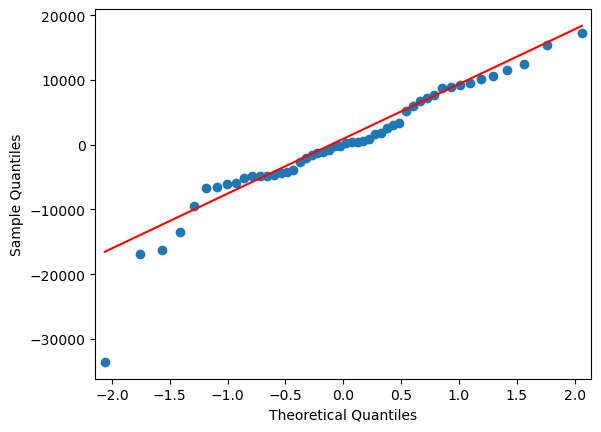

In [27]:
# Normality of Residuals - Verify if the residuals values is normally distributed or not
sm.qqplot(startup_model.resid,line='q')
plt.show()

In [28]:
# Mean equal to zero
startup_model.resid.mean()

7.639755494892597e-11

In [29]:
def standardize(x):
    return (x-x.mean())/x.std()

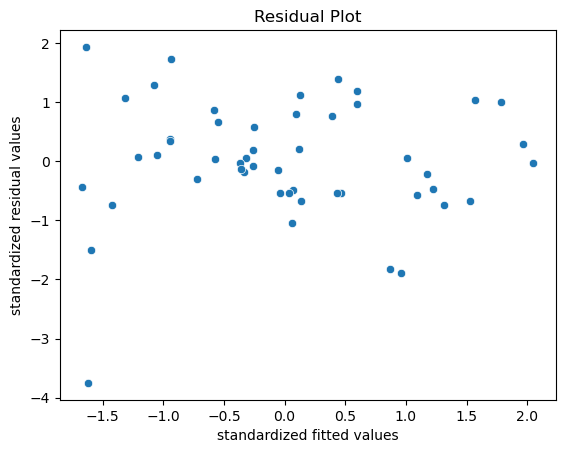

In [30]:
# Is the resid vs predicted values follow Homoscedasticity
sb.scatterplot(x=standardize(startup_model.fittedvalues),y=standardize(startup_model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show()

eval_env: 1


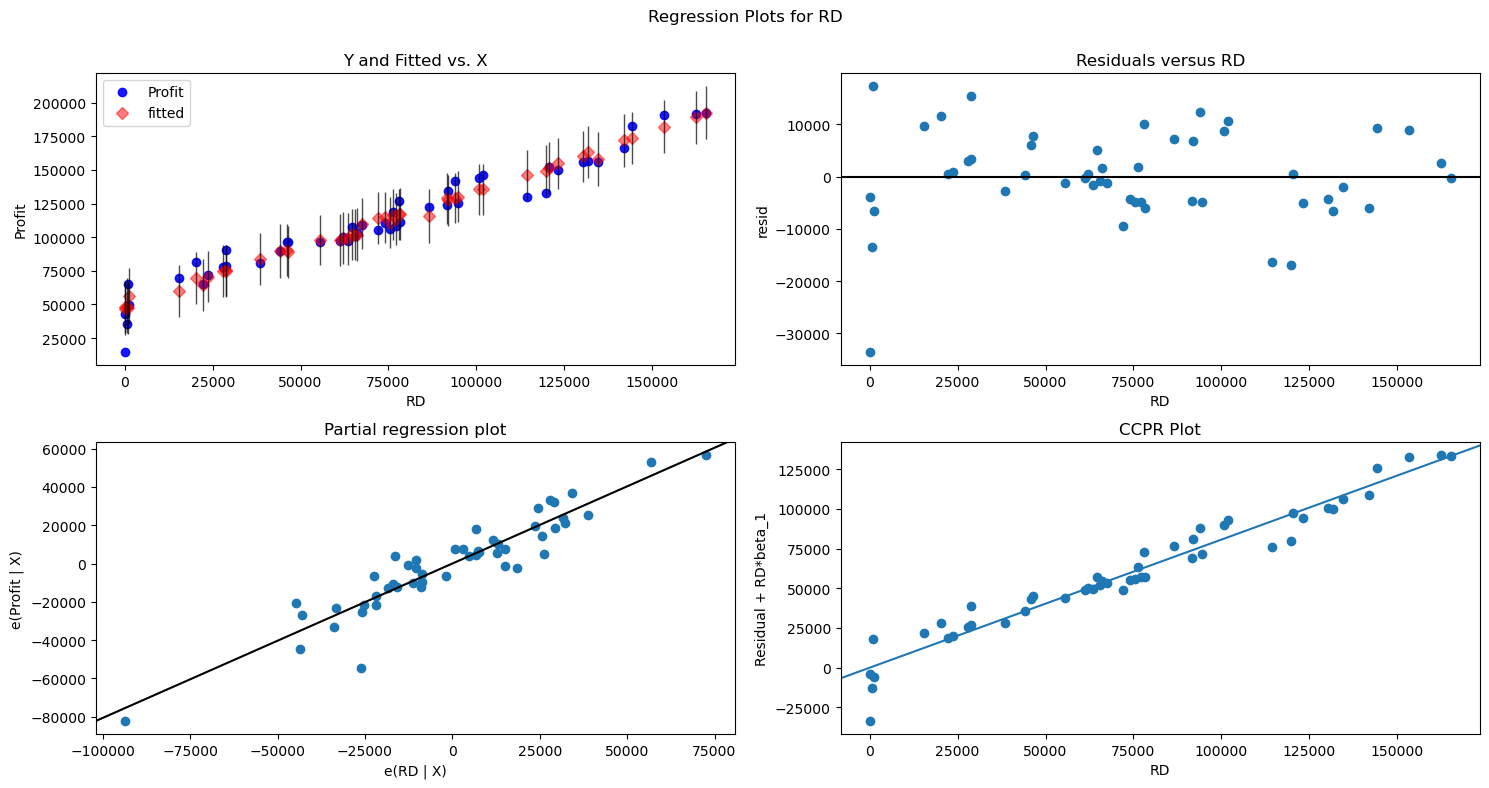

In [31]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(startup_model, "RD", fig=fig)
plt.show()

## A partial regression plot attempts to show the effect of adding another variable to a model that already has one or more independent variables.

eval_env: 1


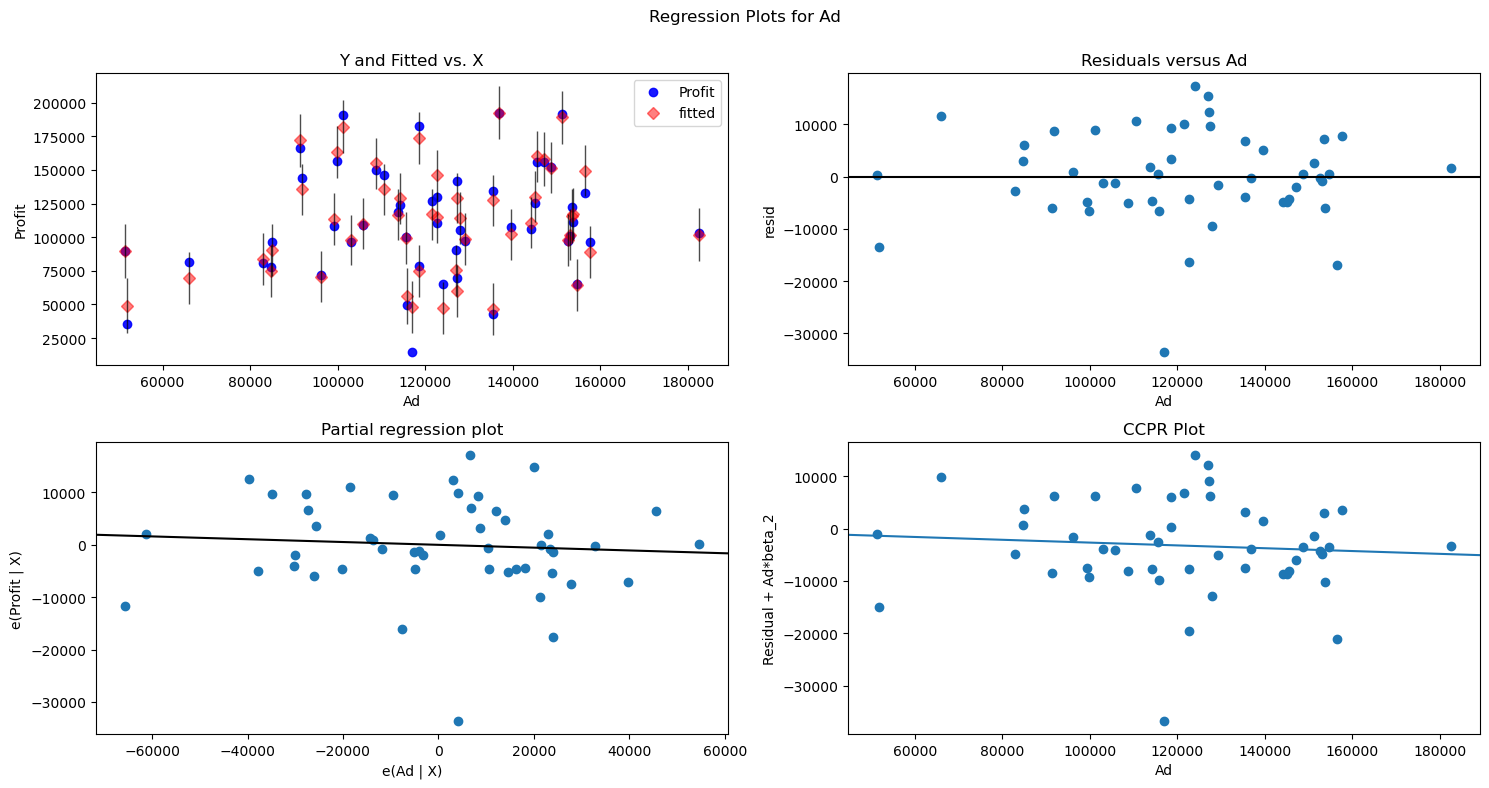

In [32]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(startup_model, "Ad", fig=fig)
plt.show()

eval_env: 1


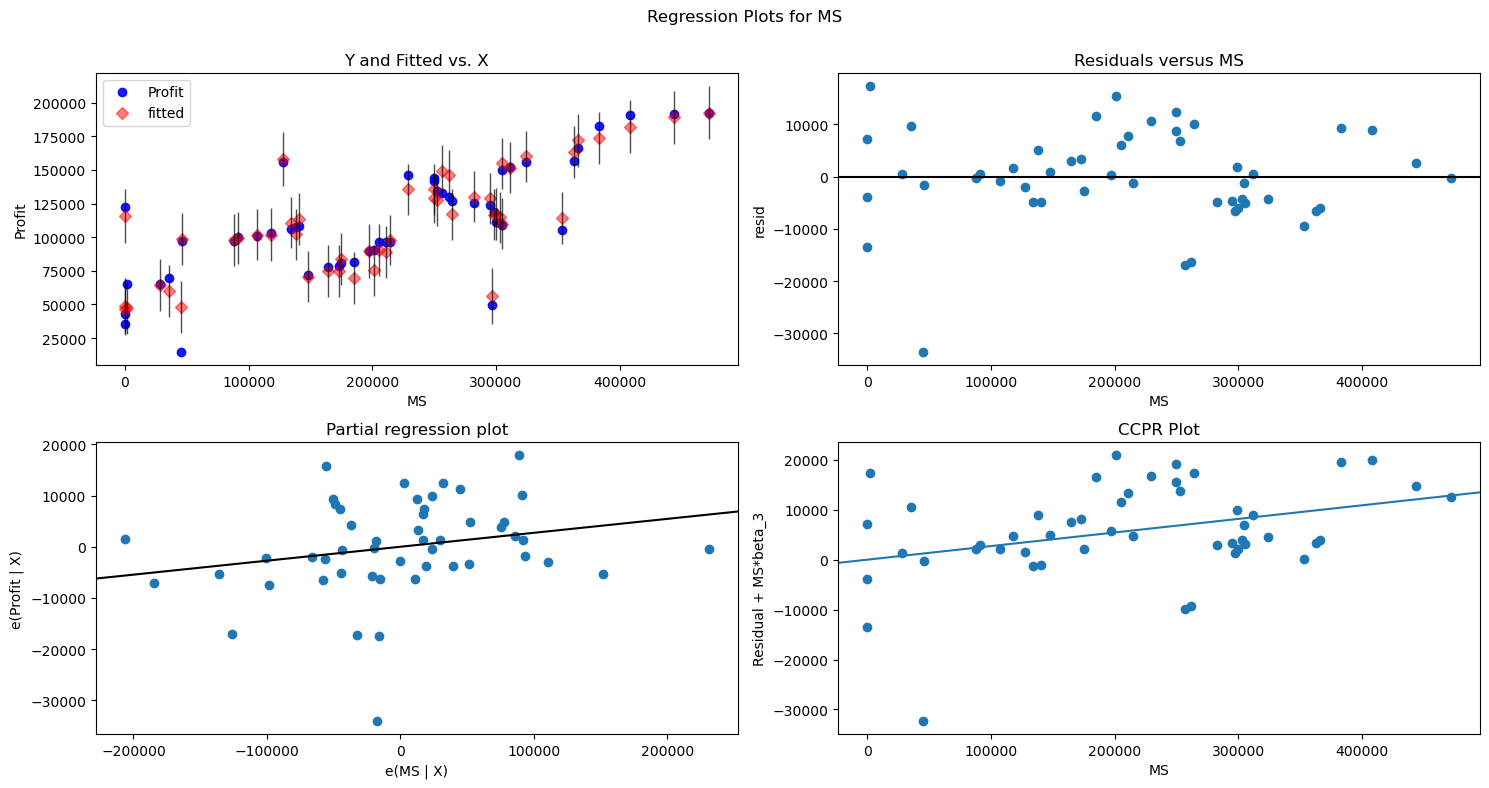

In [33]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(startup_model, "MS", fig=fig)
plt.show()

## Model Deletion Diagnostics (checking Outliers or Influencers)

## Cook's Distance

In [34]:
(c,_)=startup_model.get_influence().cooks_distance
pd.DataFrame({'Cooks_Distance': c})

,Cooks_Distance
0,0.000032
1,0.003276
2,0.032384
3,0.021721
4,0.014483
5,0.011716
6,0.002918
7,0.003565
8,0.000040
9,0.004868


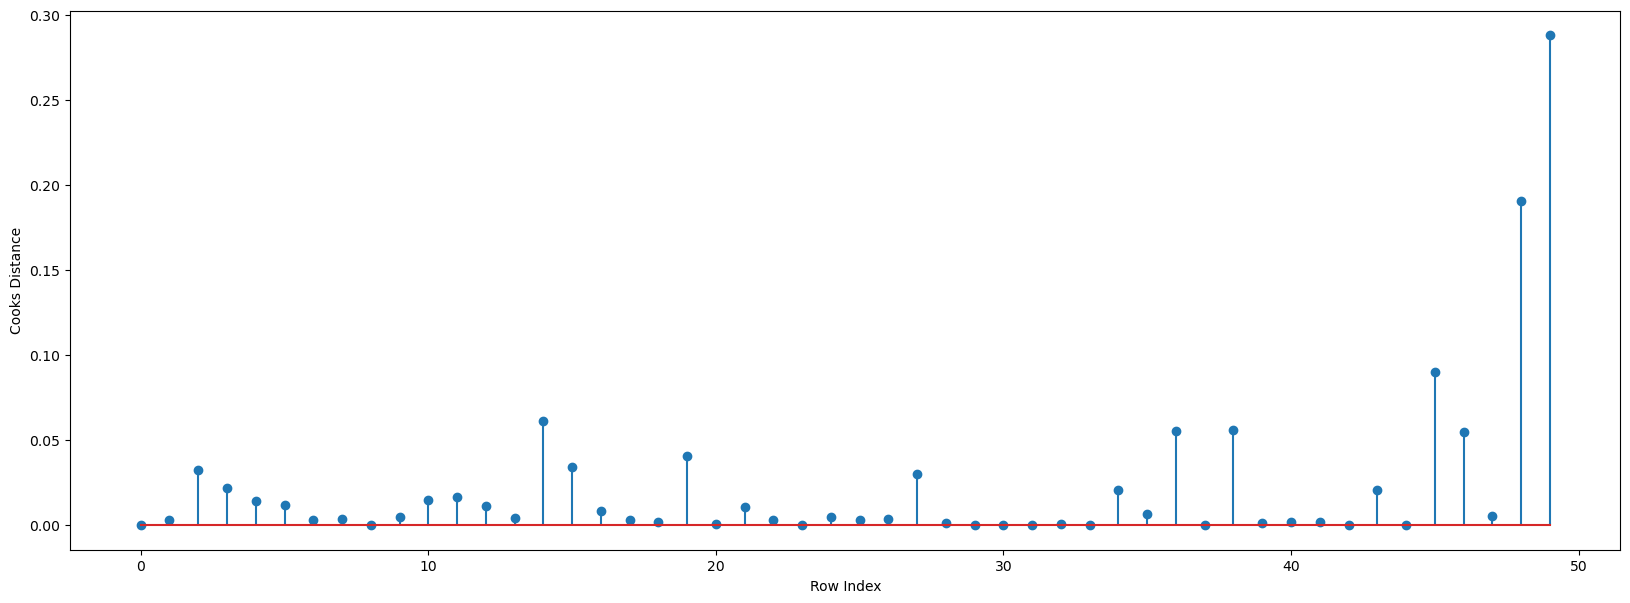

In [35]:
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(startup_data1)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [36]:
# Check max cook's Distance value and its position
np.max(c),np.argmax(c)

(0.2880822927543264, 49)

## Maximum Cook's Distance for the Model is 0.288 which is less than 0.5 , There are no Outliers that are Influencers

In [37]:
# Leverage Cutoff = (3*(k+1))/n k:No of Features/Columns used in Model(predictors) , n :Total Datapoints
k=startup_data1.shape[1]
n=startup_data1.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.36

In [38]:
from statsmodels.graphics.api import influence_plot

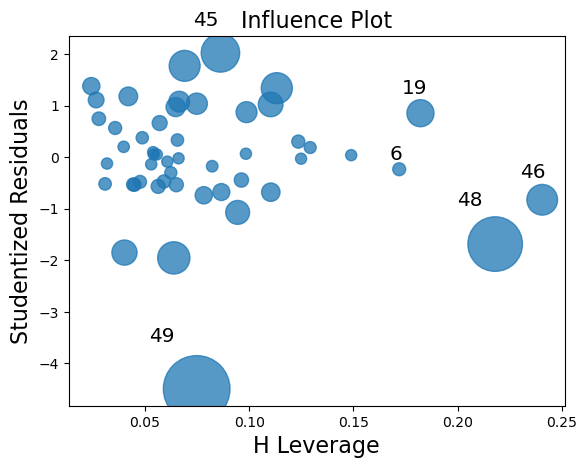

In [39]:
influence_plot(startup_model)

## Studentized residuals could be concerning when their absolute values exceed 2.  This is an aggressive stance and one could relax this criteria and consider studentized residuals exceeding 3 as an outlier.
## From Above Influence Plot shows Point 49 as Outlier which is greater than 3 , We will improve Model by removing 49th Data Record and re-train the model

In [40]:
startup_data1.iloc[49]

RD               0.0
Ad          116983.8
MS          45173.06
State     California
Profit       14681.4
Name: 49, dtype: object

In [41]:
improved_data=startup_data1.drop(startup_data1.index[49]).reset_index(drop=True)

In [42]:
improved_data

,RD,Ad,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [43]:
startup_model1=ols('Profit~RD+Ad+MS',data=improved_data).fit()

In [44]:
startup_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Thu, 27 Apr 2023   Prob (F-statistic):           8.85e-32
Time:                        14:05:43   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RD             0.7830      0.038     20.470      0.000       0.706       0.860
Ad            -0.0222      0.043     -0.518      0.607      -0.109       0.064
MS             0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
#Cook's Distance for new model
(c,_)=startup_model1.get_influence().cooks_distance

In [46]:
#Loop to remove cook's distance which is greater than 0.5 thus improving the model
while np.max(c)>0.5:
    m1=ols('Profit~RD+Ad+MS',data=improved_data).fit()
    (c,_)=m1.get_influence().cooks_distance
    print(np.max(c),np.argmax(c))
    print("---------------------------------------------")
    improved_data=improved_data.drop(improved_data.index[[np.argmax(c)]]).reset_index(drop=True)
    improved_data
else:
    final_model=ols('Profit~RD+Ad+MS',data=improved_data).fit()
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.9613162435129847


# Model Prediction

In [47]:
unseen_data=pd.DataFrame({'RD':[250000,150000,165000],"Ad":[100000,80000,100000],"MS":[400000,300000,250000]})
unseen_data

,RD,Ad,MS
0,250000,100000,400000
1,150000,80000,300000
2,165000,100000,250000


In [48]:
predicted = pd.DataFrame({'Predicted_Values':final_model.predict(unseen_data)})

In [49]:
pd.concat([unseen_data,predicted],axis=1)

,RD,Ad,MS,Predicted_Values
0,250000,100000,400000,256006.220294
1,150000,80000,300000,175626.698043
2,165000,100000,250000,185666.017555


In [50]:
pd.DataFrame({'Prepared_Model':['Model','Final Model'],'R^2_Value':[startup_model.rsquared,final_model.rsquared]})

,Prepared_Model,R^2_Value
0,Model,0.950746
1,Final Model,0.961316
